In [2]:
import wfdb
from IPython.display import display

In [3]:
folder = "/home/sarai/Documents/03 Resources/research/physionet/gait-in-neurodegenerative-disease-database-1.0.0"
file = "als1"

folder_petrolina = "/home/sarai/Documents/03 Resources/research/petrolina/Exemplos_Dados_EQUIDOSO_ FrancisTrombini/Dados brutos/dados_sensor_pelve/s20_sensor_pelve/s20_T0"
file_petrolina = "s20_gait_1_st.BIN"

In [4]:
# Read a WFDB record, and return the physical signals and a few important descriptor fields.
record = wfdb.rdsamp(f"{folder}/{file}")
display(record)

(array([[-0.22866667,         nan],
        [-0.22866667, -0.09933333],
        [-0.22833333, -0.09966667],
        ...,
        [-0.503     , -0.52933333],
        [-0.503     , -0.52933333],
        [-0.503     , -0.52933333]]),
 {'fs': 300,
  'sig_len': 90000,
  'n_sig': 2,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV'],
  'sig_name': ['left-foot', 'right-foot'],
  'comments': []})

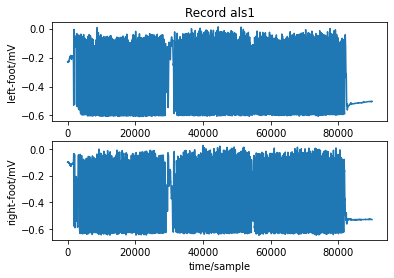

{'record_name': 'als1',
 'n_sig': 2,
 'fs': 300,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 90000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['left-foot', 'right-foot'],
 'p_signal': array([[-0.22866667,         nan],
        [-0.22866667, -0.09933333],
        [-0.22833333, -0.09966667],
        ...,
        [-0.503     , -0.52933333],
        [-0.503     , -0.52933333],
        [-0.503     , -0.52933333]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['als1.let', 'als1.rit'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [3000.0, 3000.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-686, -32768],
 'checksum': [1016, -16030],
 'block_size': [0, 0]}

In [5]:
# Read a WFDB record and return the signal and record descriptors 
# as attributes in a Record or MultiRecord object.
record = wfdb.rdrecord(f"{folder}/{file}")
wfdb.plot_wfdb(record=record, title=f"Record {file}") 
record.__dict__

In [6]:
# can use "record.p_signal" to use the data with other libraries

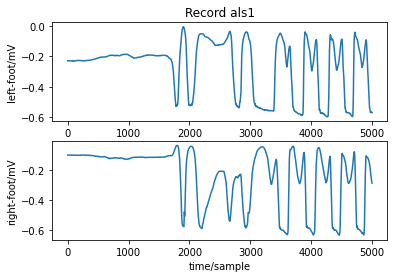

{'record_name': 'als1',
 'n_sig': 2,
 'fs': 300,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 5000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['left-foot', 'right-foot'],
 'p_signal': array([[-0.22866667,         nan],
        [-0.22866667, -0.09933333],
        [-0.22833333, -0.09966667],
        ...,
        [-0.57066667, -0.28366667],
        [-0.571     , -0.28633333],
        [-0.57066667, -0.287     ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['als1.let', 'als1.rit'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [3000.0, 3000.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-686, -2048],
 'checksum': [9371, 37918],
 'block_size': [0, 0]}

In [7]:
record = wfdb.rdrecord(f"{folder}/{file}", sampto=5000)
wfdb.plot_wfdb(record=record, title=f"Record {file}") 
record.__dict__

In [8]:
ecg_record = wfdb.rdheader(f"{folder}/{file}")


In [9]:
ecg_record.__dict__

{'record_name': 'als1',
 'n_sig': 2,
 'fs': 300,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 90000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['left-foot', 'right-foot'],
 'p_signal': None,
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['als1.let', 'als1.rit'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [3000.0, 3000.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-686, -32768],
 'checksum': [1016, -16030],
 'block_size': [0, 0]}

In [10]:
signals, fields = wfdb.rdsamp(f"{folder}/{file}", sampto=5000)

In [11]:
fields


{'fs': 300,
 'sig_len': 5000,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['left-foot', 'right-foot'],
 'comments': []}

# Joining all files in a pandas dataframe

In [44]:
import pandas as pd

headers = [
    "Elapsed Time (sec)",
    "Left Stride Interval (sec)",
    "Right Stride Interval (sec)",
    "Left Swing Interval (sec)",
    "Right Swing Interval (sec)",
    "Left Swing Interval (% of stride)",
    "Right Swing Interval (% of stride)",
    "Left Stance Interval (sec)",
    "Right Stance Interval (sec)",
    "Left Stance Interval (% of stride)",
    "Right Stance Interval (% of stride)",
    "Double Support Interval (sec)",
    "Double Support Interval (% of stride)"
]

class_dicts = {
    "park": 0,
    "hunt": 1,
    "control": 2, 
    "als": 4,
}


with open(f"{folder}/RECORDS") as f:
    records = f.readlines()
    records = [record.rstrip() for record in records]

dataframes = []
for record in records:
    data = pd.read_csv(f"{folder}/{record}.ts", sep="	", header=None)
    data.columns = headers
    data['Label'] = record
    data['Class'] = [class_dicts[key] for key in class_dicts.keys() if key in record][0]
    dataframes.append(data)
    
df = pd.concat(dataframes)

In [50]:
assert len(df["Label"].unique()) == len(records)   # sanity check
assert len(df["Class"].unique()) == 4   # sanity check

In [47]:
df.tail()

,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride),Label,Class
217,294.2700,1.2467,1.2400,0.4600,0.4500,36.90,36.29,0.7867,0.7900,63.10,63.71,0.3367,27.01,park9,0
218,295.4800,1.2100,1.2267,0.4533,0.4300,37.47,35.05,0.7567,0.7967,62.53,64.95,0.3267,27.00,park9,0
219,296.6933,1.2133,1.2067,0.4533,0.4333,37.36,35.91,0.7600,0.7733,62.64,64.09,0.3267,26.92,park9,0
220,297.9233,1.2300,1.2233,0.4600,0.4333,37.40,35.42,0.7700,0.7900,62.60,64.58,0.3367,27.37,park9,0
221,299.1867,1.2633,1.2533,0.4700,0.4500,37.20,35.90,0.7933,0.8033,62.80,64.10,0.3433,27.18,park9,0


# Running Releif on Physionet Data

In [53]:
# Needs "df" to be set
from skrebate import ReliefF

features, labels = df.drop(['Label', 'Class'], axis=1).values, df['Class'].values
headers = list(df.drop(['Label', 'Class'], axis=1))

fs = ReliefF(n_neighbors=100, verbose=True)
fs.fit(features, labels)

/home/sarai/.virtualenvs/relief/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Created distance array in 2.791440010070801 seconds.
Feature scoring under way ...
Completed scoring in 644.092871427536 seconds.


ReliefF(discrete_threshold=10, n_features_to_select=10, n_jobs=1,
        n_neighbors=100, verbose=True)

In [54]:
scoreDict = {}
for feature_name, feature_score in zip(df.drop(['Label', 'Class'], axis=1).columns, fs.feature_importances_):
    scoreDict[feature_name] = feature_score

sorted_names = sorted(scoreDict, key=lambda x: scoreDict[x], reverse=True)
for name in sorted_names:
    print(name, scoreDict[name])

Right Stride Interval (sec) 0.010869831295407601
Right Stance Interval (sec) 0.010686596567830258
Right Swing Interval (% of stride) 0.010663154118390455
Right Stance Interval (% of stride) 0.010663154118390453
Left Swing Interval (% of stride) 0.0055535179242970825
Left Stance Interval (% of stride) 0.005553517924297082
Left Stride Interval (sec) 0.0008204299709680393
Right Swing Interval (sec) 0.0006880857961448208
Double Support Interval (sec) 0.0006409141896279575
Left Stance Interval (sec) 0.0006345617278842723
Left Swing Interval (sec) 0.000481431355050489
Double Support Interval (% of stride) 0.00047385798342666985
Elapsed Time (sec) -0.0018107917900434365


Results matched with results from paper: "Feature selection and construction for the discrimination of neurodegenerative diseases based on gait analysis"
(https://www.notion.so/Feature-selection-and-construction-for-the-discrimination-of-neurodegenerative-diseases-based-on-gai-15d78618be0a47b3b1be11f6e9d05e60)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = make_pipeline(
    ReliefF(n_features_to_select=2, n_neighbors=100),
    RandomForestClassifier(n_estimators=100)
)